
### Spectroscopic Data Analysis  

        Sean Keenan, PhD Physics  
        Quantum Memories Group, Heriot-Watt University, Edinburgh  
        2021  

In [14]:
%matplotlib widget
import data_funcs as df
from filter_funcs import smooth_data
from fit_funcs import peak_find
from math_funcs import bin_data, ODset_calc
import matplotlib.pyplot as mp
import numpy as np
import plotting_funcs as plt
import os

mp.style.use('signature.mplstyle')


##### Set-up script  

        Select input folder and polarisation  

In [15]:
# folder containing all the requisite subfolders and data - refrences included
local = True
folder = r"0824_BB_IR_COL_T"
if local == True:
    path = os.path.join(r"C:\Users\sk88\Desktop", folder)
else:
    path = os.path.join(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2023_Pr_YVO_Sectroscopy\Visible\0.5%", folder)
# mark energies / wavelengths of interest
roi = (6600, 6000)
ir_forbid = ([6686, 6822], '--','red')
ir_sigma = ([6603, 6971], '-.', 'cyan')
ir_pi = ([6782, 6864], ':', 'olive')
ir_woi= [ir_forbid, ir_sigma, ir_pi]
ir_forbid = [6686, 6822]
ir_sigma = [6603, 6971]
ir_pi = [6782, 6864]
ir = [ir_forbid, ir_sigma, ir_pi]

hotlines_sigma = ([6650, 6737, 6783, 6971, 6914], (0, (5, 10)), 'blue')
hotlines_pi = ([6542, 6728, 6787, 6891], (0, (3, 10, 1, 10)), 'green')
hotlines = [hotlines_pi, hotlines_sigma]

ir_woi = [ir_forbid, ir_sigma, ir_pi, hotlines_pi, hotlines_sigma]
# calibrate wavelength of OSA
calibration = 1
# reference power correction
correction = 150/540
correction = 350/600
# averaging window length
window = 50
# reference names
refs = ["ref", "reference", "R"]
# file extension types
exts = ('.csv', '.txt', '.CSV')
exceptions = ["notes", "setup", "ignore", "Thermal OD"]
labels = 'wavenumber (cm${^{-1}}$)', 'OD'


##### Import Raw Spectroscopy Data
        Load raw data from csv file and sort into groups - polarisations -> reference / spectrum


In [16]:
# interogate directory to extract folder and file names
folder_list, file_list = df.dir_interogate(path, exts, exceptions)
# assemble reference paths
reference_paths = df.search_paths(folder_list, file_list, include=refs)
ref_paths_list = [os.path.join(path, x) for ref_lists in reference_paths for x in ref_lists]
# find polarisation numbers from reference file names
polarisations = [df.find_numbers(path, '\d+') for path in reference_paths[0]]
# assemble spectra paths
spectra_paths = df.search_paths(folder_list, file_list, include=polarisations, exclude=refs)
spectra_paths_list = [os.path.join(path, x) for spectra_lists in spectra_paths for x in spectra_lists]
# extract raw data values, seperate metadata from data and split into wavelengths and intensities
ref_metadata, ref_data = df.spectrum_extract(ref_paths_list, keys=polarisations)
spectra_metadata, spectra_data = df.spectrum_extract(spectra_paths_list, keys=polarisations)
spectra_waves, spectra_intensities = df.seperate_lists(spectra_data)
reference_waves, reference_intensities = df.seperate_lists(ref_data)


##### Main calculations

        Calculate OD and zero shift data
        Correct for calibration of wavemeter

In [17]:
# calculate OD and correct for power variance
OD_sets = ODset_calc(reference_sets=reference_intensities, transmitted_sets=spectra_intensities, c_factor=correction)
zeroed_OD = [[values - bin_data(values, 100) for values in spectra] for spectra in OD_sets]
smoothed = [[smooth_data(values, N=window) for values in spectra] for spectra in zeroed_OD]
# convert wavelengths to wavenumbers
wavevector_sets = [[1E7 / values for values in wavelengths] for wavelengths in spectra_waves]


##### Find Peaks and Energies

        Calculate frequencies, wavenumbers and wavelengths of peaks

In [31]:
prom = 0.05
top = 0.01
peaks = [[peak_find(values, waves, prom_tol=prom, top_tol=top, lims=roi) for values, waves in zip(intensities, wavenumbers)] for intensities, wavenumbers in zip(smoothed, wavevector_sets)]

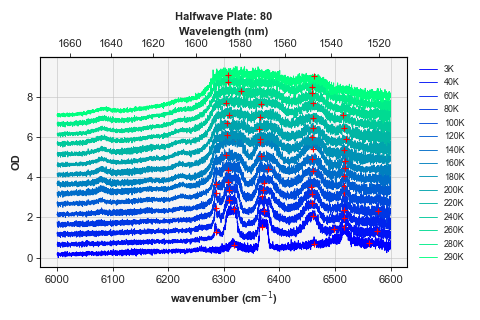

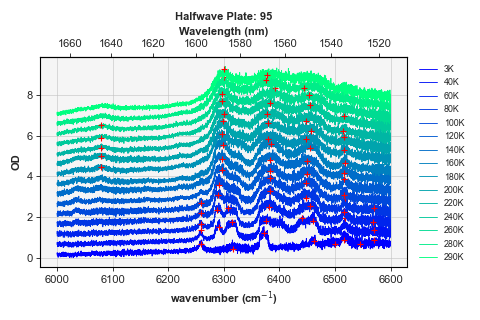

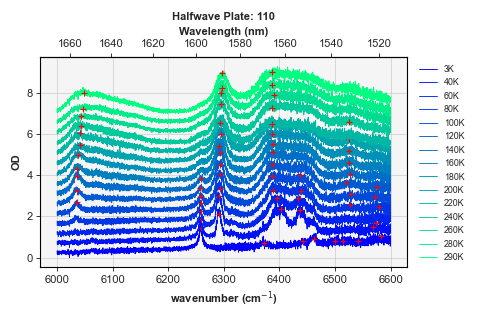

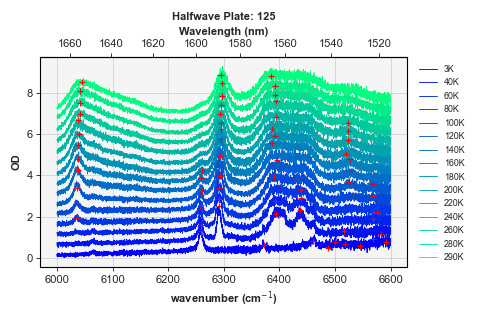

In [32]:
plt.plot_spectra(wavevector_sets, OD_sets, data_indexes=peaks, keys=polarisations, shifter=0.5, lims=roi, axis_lbls=labels, data_labels=folder_list)

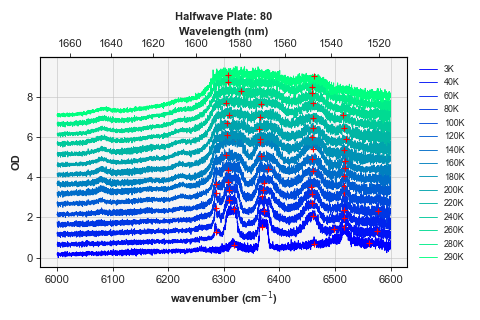

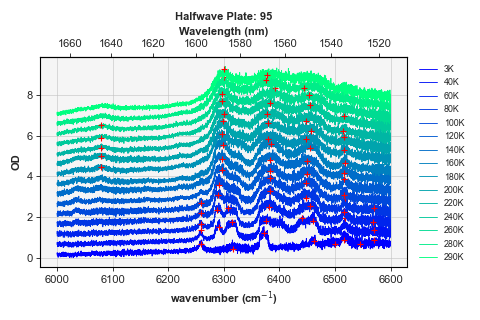

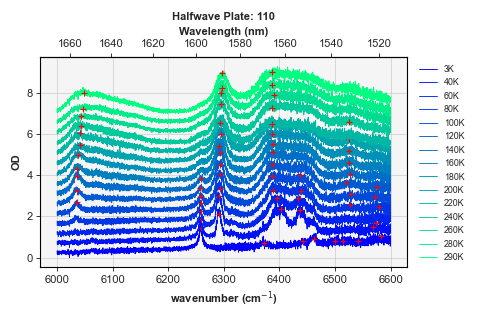

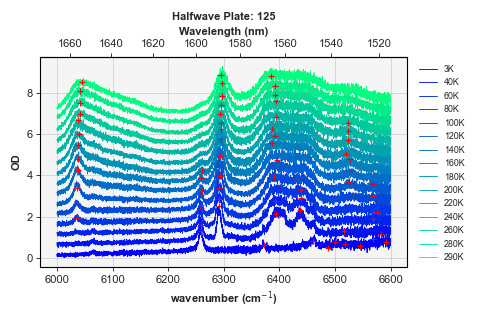

In [33]:
plt.plot_spectra(wavevector_sets, zeroed_OD, data_indexes=peaks, keys=polarisations, shifter=0.5, lims=roi, axis_lbls=labels, data_labels=folder_list)

In [21]:
shifter = 1
shift= 0
colour = mp.cm.winter(np.linspace(0, 1, len(wave_ground)))
fig, ax = mp.subplots()
for n, wave in enumerate(wave_ground):
    lower, upper = sf.zoom(wave, bounds=(7050, 6550))
    x = np.array(wave)
    y = np.array([value + shift for value in od_ground[n]])
    ax.plot(x[lower:upper], y[lower:upper], color = colour[n], label= 'HWP ' + polarisations[n] + ' $^{\circ}$')
    ax.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax.set_ylabel('OD')
    ax.legend(loc='upper right')
    shift += shifter

NameError: name 'wave_ground' is not defined

In [ ]:
sigma_indexes = [0, 2, 6, 14]
pi_indexes = [0, 2, 6, 14]

shifter = 1
shift= 0
colour = mp.cm.winter(np.linspace(0, 1, len(sigma_indexes)))
fig_1, ax_1 = mp.subplots()
for index, n in enumerate(sigma_indexes):
    lower, upper = sf.zoom(wavenumber_sets[0][n], bounds=(7100, 6500))
    x = np.array(wavenumber_sets[0][n])
    y = np.array([value + shift for value in od_corrected[0][n]])
    ax_1.plot(x[lower:upper], y[lower:upper], color=colour[index], label=folder_list[n])
    ax_1.set_title('$\sigma$ polarised')
    ax_1.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax_1.set_ylabel('OD')
    ax_1.legend()
    shift += shifter

shifter = 1
shift= 0
colour = mp.cm.winter(np.linspace(0, 1, len(pi_indexes)))
fig_2, ax_2 = mp.subplots()
for index, n in enumerate(pi_indexes):
    lower, upper = sf.zoom(wavenumber_sets[0][0], bounds=(7100, 6450))
    x = np.array(wavenumber_sets[-1][0])
    y = np.array([value + shift for value in od_corrected[-1][n]])
    ax_2.plot(x[lower:upper], y[lower:upper], color = colour[index], label=os.path.split(folder_list[n])[1])
    ax_2.set_title('$\pi$ polarised')
    ax_2.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax_2.set_ylabel('OD')
    ax_2.legend()
    shift += shifter

In [ ]:
from scipy.signal import find_peaks, argrelmax, argrelmin

low, high = sf.zoom(shifted_sets[0][2], (603, 610))
test_x = np.array(shifted_sets[0][2])
test_y = np.array(od_subtracted[0][2])
grad_y = np.gradient(test_y)
grad_2y = np.gradient(grad_y)
a = argrelmax(test_y)
b = a[0].tolist()
c = [x for x in b if x >= low and x <= high]
fig, ax = mp.subplots()
ax.plot(test_x[low:high], test_y[low:high], 'r')
ax.plot(test_x[c], test_y[c], 'xr')
ax.plot(test_x[low:high], grad_y[low:high], '--b')
ax.plot(test_x[c], grad_y[c], 'xb')
ax.plot(test_x[low:high], grad_2y[low:high], '--g')
ax.plot(test_x[c], grad_2y[c], 'xg')

#fit, err = ff.fitNguass()

In [ ]:
low_128, high_128 = sf.zoom(shifted_sets[0][0], bounds=(605, 620))
low_173, high_173 = sf.zoom(shifted_sets[0][0], bounds=(596, 610))
peak_sub_128 = [[sf.find_OD(y_values=od, peaks=peaks, lims=(low_128, high_128)) for od, peaks in zip(od_set, peak_set)] for od_set, peak_set in zip(od_subtracted, sub_peaks)]
peak_sub_173 = [[sf.find_OD(y_values=od, peaks=peaks, lims=(low_173, high_173)) for od, peaks in zip(od_set, peak_set)] for od_set, peak_set in zip(od_subtracted, sub_peaks)]

In [ ]:
low_128, high_128 = sf.zoom(shifted_sets[0][0], bounds=(603, 607))
low_173, high_173 = sf.zoom(shifted_sets[0][0], bounds=(594, 597))
peak_cor_128 = [[sf.find_OD(y_values=od, peaks=peaks, lims=(low_128, high_128)) for od, peaks in zip(od_set, peak_set)] for od_set, peak_set in zip(od_corrected, corrected_peaks)]
peak_cor_173 = [[sf.find_OD(y_values=od, peaks=peaks, lims=(low_173, high_173)) for od, peaks in zip(od_set, peak_set)] for od_set, peak_set in zip(od_corrected, corrected_peaks)]

In [ ]:
peak_0 = [value for values in peak_cor_128[0] for value in values]
od_frequencies123 = sf.peak_freq(corrected_peaks, shifted_sets, lims=[603,607])
freq_0 = [frequency for frequencies in od_frequencies123[0] for frequency in frequencies]
wavenumber_0 = [sf.converter(freq, 1, 0) for freq in freq_0]
print(wavenumber_0)

temp_0 = [3.2, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]
fig_1, ax_1 = mp.subplots()
ax_1.set_title('$\sigma$ polarisation at 16529.87 - 16520.30 cm$^{-1}$')
ax_1.set(xlabel='Temperature', ylabel='OD')
ax_1.plot(temp_0, peak_0, 'x')

In [ ]:
peak_2 = [peak_sub_128[0][i][0] for i in range(len(peak_sub_128[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks, shifted_sets, lims=[607,620])
freq_2 = [sub_frequencies[0][i][0] for i in range(len(sub_frequencies[0])) if i != 0]
wavenumber_2 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq_2]
print(wavenumber_2)

temp_2 = [60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]
peak_2.pop(0)
peak_2.pop(1)
peak_2.pop(2)
peak_2.pop(3)
fig_1, ax_1 = mp.subplots()
ax_1.set_title('$\sigma$ polarisation at 16472.69 cm$^{-1}$')
ax_1.set_xticks(temp_2)
ax_1.set(xlabel='Temperature', ylabel='OD')
ax_1.plot(temp_2, peak_2, 'x')

In [ ]:
peak_3 = [peak_sub_128[0][i][-2] for i in range(len(peak_sub_128[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks,shifted_sets, lims=[605,620])
freq_3 = [sub_frequencies[0][i][-2] for i in range(len(sub_frequencies[0])) if i != 0]
wavenumber_3 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq_3]
print(wavenumber_3)
temp_3 = [10, 20, 30, 40, 140, 160, 180, 200, 220, 240, 260, 280]
peak_3.pop(0)
peak_3.pop(4)
peak_3.pop(5)
peak_3.pop(6)
peak_3.pop(7)
peak_3.insert(0, peak_sub_128[0][1][-3])
fig_2, ax_2 = mp.subplots()
ax_2.set_title('$\sigma$ polarisation at 16378.12 cm$^{-1}$')
ax_2.set(xlabel='Temperature', ylabel='OD')
ax_2.set_xticks(temp_3)
ax_2.plot(temp_3, peak_3, 'x')

In [ ]:
peak_4 = [peak_sub_128[0][i][-1] for i in range(len(peak_sub_128[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks, shifted_sets, lims=[605,620])
freq_4 = [sub_frequencies[0][i][-1] for i in range(len(sub_frequencies[0])) if i != 0]
wavenumber_4 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq_4]
print(wavenumber_4)
temp_4 = [10, 20, 30, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]
fig_3, ax_3 = mp.subplots()
ax_3.set_title('$\sigma$ polarisation at 16174.57 cm$^{-1}$')
ax_3.set(xlabel='Temperature', ylabel='OD')
ax_3.set_xticks(temp_4)
ax_3.plot(temp_4, peak_4, 'x')

In [ ]:
peak173_0 = [value for values in peak_cor_173[3] for value in values]
od_frequencies173 = sf.peak_freq(corrected_peaks, shifted_sets, lims=[590,598])
freq173_0 = [frequency for frequencies in od_frequencies173[3] for frequency in frequencies]
wavenumber173_0 = [sf.converter(freq, 1, 0) for freq in freq173_0]
print(wavenumber173_0)

temp173_0 = [3.2, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
fig_0, ax_0 = mp.subplots()
ax_0.set_title('$\pi$ polarisation at 16812.82 - 16773.16 cm$^{-1}$')
ax_0.set(xlabel='Temperature', ylabel='OD')
ax_0.plot(temp173_0, peak173_0, 'xr')

In [ ]:
peak173_2 = [peak_sub_173[3][i][0] for i in range(len(peak_sub_173[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks, shifted_sets, lims=[597,610])
freq173_2 = [sub_frequencies[3][i][0] for i in range(len(sub_frequencies[3])) if i != 0]
wavenumber173_2 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq173_2]
print(wavenumber173_2)
peak173_2.pop(0)
peak173_2.pop(1)
temp173_2 = [30, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

fig_4, ax_4 = mp.subplots()
ax_4.set_title('$\pi$ polarisation at 16704.25 cm$^{-1}$')
ax_4.set(xlabel='Temperature', ylabel='OD')
ax_4.set_xticks(temp173_2)
ax_4.plot(temp173_2, peak173_2, 'xr')


In [ ]:
peak173_3 = [peak_sub_173[3][i][1] for i in range(len(peak_sub_173[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks, shifted_sets, lims=[597,610])
freq173_3 = [sub_frequencies[3][i][1] for i in range(len(sub_frequencies[3])) if i != 0]
wavenumber173_3 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq173_3]
print(wavenumber173_3)
peak173_3.pop(0)
peak173_3.pop(1)
peak173_3.pop(2)
peak173_3.pop(3)
temp173_3 = [60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

fig_5, ax_5 = mp.subplots()
ax_5.set_title('$\pi$ polarisation at 16606.87 cm$^{-1}$')
ax_5.set(xlabel='Temperature', ylabel='OD')
ax_5.set_xticks(temp173_3)
ax_5.plot(temp173_3, peak173_3, 'xr')

In [ ]:
peak173_4 = [peak_sub_173[3][i][-1] for i in range(len(peak_sub_173[0])) if i != 0]
sub_frequencies = sf.peak_freq(sub_peaks, shifted_sets, lims=[597,610])
freq173_4 = [sub_frequencies[3][i][-1] for i in range(len(sub_frequencies[0])) if i != 0]
wavenumber173_4 = [sf.converter(freq, d_type=1, c_type=0) for freq in freq173_4]
print(wavenumber173_3)
peak173_4.pop(0)

temp173_4 = [20, 30, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

fig_6, ax_6 = mp.subplots()
ax_6.set_title('$\pi$ polarisation at 16444.17 cm$^{-1}$')
ax_6.set(xlabel='Temperature', ylabel='OD')
ax_6.set_xticks(temp173_4)
ax_6.plot(temp173_4, peak173_4, 'xr')

3P0 

In [ ]:
import matplotlib.pyplot as mp
temp = [3.2, 10, 20, 30, 40, 50, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]
count = -1

fig_1, ax_1 = mp.subplots()
fig_2, ax_2 = mp.subplots()
fig_3, ax_3 = mp.subplots()

ax_1.set(xlabel='Temperature', ylabel='OD')
ax_2.set(xlabel='Temperature', ylabel='OD')
ax_3.set(xlabel='Temperature', ylabel='OD')

for index_1, OD_list in enumerate(peak_sub_128[0]):
    for index_2, value in enumerate(OD_list):
        if index_2 == 0:
            ax_1.plot(temp[index_1], value, 'xb')
        if index_1 > 9 and index_2 == 1:
            ax_2.plot(temp[index_1], value, 'xr')
        if index_2 == 2 or index_1 < 10 and index_2 == 2:
            ax_3.plot(temp[index_1], value, 'xg')


In [ ]:
import matplotlib.pyplot as mp
temp = [3.2, 10, 20, 30, 40, 50, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

fig_1, ax_1 = mp.subplots()
fig_2, ax_2 = mp.subplots()
fig_3, ax_3 = mp.subplots()

ax_1.set(xlabel='Temperature', ylabel='OD')
ax_2.set(xlabel='Temperature', ylabel='OD')
ax_3.set(xlabel='Temperature', ylabel='OD')

for index_1, OD_list in enumerate(peak_OD_173[3]):
    for index_2, value in enumerate(OD_list):
        if index_2 == 0:
            ax_1.plot(temp[index_1], value, 'xb')
        if index_2 == 1:
            ax_2.plot(temp[index_1], value, 'xr')
        if index_2 == 2:
            ax_3.plot(temp[index_1], value, 'xg')


In [ ]:
import fit_funcs as ff
import numpy as np
import matplotlib.pyplot as mp
from scipy.optimize import leastsq

x = np.linspace(0, 100, 100)
param_1 = [1, 5, 80, 8]
param_2 = [1, 0, 20, 5]
param_3 = [1, -2, 60, 5]
param_4 = [2, 0, 30, 10]

fit_param_1 = [1, 5, 70, 20]
fit_param_2 = [1, 0, 20, 20]
fit_param_3 = [1, -2, 60, 10]
fit_param_4 = [1, 0, 20, 20]
param = param_1 + param_2 + param_3 + param_4
fit_param = fit_param_1 + fit_param_2 + fit_param_3 + fit_param_4
y = ff.N_gaussian(x, *param)

fit, err = ff.fitNgauss(x, y, params=fit_param)

mp.plot(x, y)
mp.plot(x, ff.N_gaussian(x, *fit), 'x')
mp.show()